In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from dateutil.relativedelta import relativedelta

In [3]:
df=pd.read_csv('customer_sales.csv')

In [5]:
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,1/1/11,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,$45,-26.0,3.0
1,AZ-2011-9050313,1/3/11,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,$854,290.0,7.0
2,AZ-2011-6674300,1/4/11,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,$140,21.0,3.0
3,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,$27,-22.0,2.0
4,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,$17,-1.0,2.0


In [7]:
df.tail(10)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
8037,AZ-2014-436448,12/30/14,Georgia Arundale,Italy,Campania,Naples,South,Corporate,Economy,Office Supplies,Binders,"Acco Binder, Economy",0.0,$45,6.0,3.0
8038,AZ-2014-1412225,12/31/14,Leon Barnes,United Kingdom,England,Worcester,North,Consumer,Priority,Office Supplies,Storage,"Fellowes Shelving, Single Width",0.0,$289,75.0,5.0
8039,AZ-2014-4217323,12/31/14,Evie Morton,France,Normandy,Caen,Central,Consumer,Economy Plus,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",0.1,$557,217.0,3.0
8040,AZ-2014-8174835,12/31/14,Eloise Sykes,Germany,North Rhine-Westphalia,Bielefeld,Central,Consumer,Economy,Office Supplies,Supplies,"Kleencut Shears, Serrated",0.0,$261,13.0,6.0
8041,AZ-2014-7604524,12/31/14,Rebecca Chamberlain,Germany,Hamburg,Hamburg,Central,Home Office,Economy,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",0.0,$32,8.0,5.0
8042,AZ-2014-766953,12/31/14,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,$245,91.0,2.0
8043,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,$30,-10.0,2.0
8044,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,$23,-6.0,4.0
8045,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,$108,-19.0,3.0
8046,AZ-2014-766953,12/31/14,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Technology,Phones,"Motorola Audio Dock, VoIP",0.0,$867,251.0,5.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8047 non-null   object 
 1   Order Date     8041 non-null   object 
 2   Customer Name  8046 non-null   object 
 3   Country        8046 non-null   object 
 4   State          8043 non-null   object 
 5   City           8043 non-null   object 
 6   Region         8047 non-null   object 
 7   Segment        8046 non-null   object 
 8   Ship Mode      8042 non-null   object 
 9   Category       8042 non-null   object 
 10  Sub-Category   8047 non-null   object 
 11  Product Name   8047 non-null   object 
 12  Discount       8040 non-null   float64
 13  Sales          8045 non-null   object 
 14  Profit         8034 non-null   float64
 15  Quantity       8034 non-null   float64
dtypes: float64(3), object(13)
memory usage: 1006.0+ KB


In [11]:
df[df.isnull().any(axis=1)]

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
535,AZ-2011-9528187,6/20/11,Charlie Power,NaN,England,Mansfield,North,Home Office,Economy,Office Supplies,Labels,"Novimex Legal Exhibit Labels, 5000 Label Set",0.0,$119,16.0,11.0
538,AZ-2011-9777525,6/21/11,NaN,United Kingdom,England,Weston-super-Mare,North,Consumer,Economy,Office Supplies,Binders,"Avery Binder Covers, Clear",0.0,$32,7.0,3.0
543,AZ-2011-9153342,6/22/11,Harold Smith,Germany,North Rhine-Westphalia,Hagen,Central,NaN,Economy Plus,Office Supplies,Paper,"Enermax Memo Slips, Premium",0.0,$31,1.0,2.0
550,AZ-2011-4946550,6/22/11,Joseph Locke,Austria,Vienna,Vienna,Central,Corporate,Priority,NaN,Fasteners,"Stockwell Paper Clips, Bulk Pack",0.0,$14,7.0,1.0
557,AZ-2011-7543304,6/22/11,Lane Taylor,Germany,Rhineland-Palatinate,Ludwigshafen am Rhein,Central,Corporate,Economy,Office Supplies,Storage,"Fellowes Shelving, Wire Frame",0.1,NaN,123.0,7.0
561,AZ-2011-8847796,6/24/11,Walter Aguilar,Spain,Madrid,Madrid,South,Consumer,Economy,Office Supplies,Art,"Stanley Pencil Sharpener, Fluorescent",0.0,NaN,55.0,7.0
562,AZ-2011-8847796,6/24/11,Walter Aguilar,Spain,Madrid,Madrid,South,Consumer,Economy,NaN,Binders,"Cardinal Index Tab, Durable",0.0,$46,21.0,6.0
563,BN-2011-3243410,6/24/11,David Lowe,Netherlands,Limburg,Roermond,Central,Consumer,Economy,NaN,Storage,"Tenex Lockers, Industrial",0.5,$205,-90.0,2.0
564,BN-2011-151204,6/24/11,Benjamin Lee,Germany,Baden-Württemberg,Freiburg,Central,Corporate,Economy,NaN,Storage,"Fellowes Box, Industrial",0.1,$54,-3.0,3.0
565,BN-2011-7016974,6/25/11,Jordan Peacock,Sweden,Stockholm,Stockholm,North,Corporate,Economy,NaN,Fasteners,"Accos Push Pins, Assorted Sizes",0.5,$18,-17.0,3.0


### MISSSING VALUES IN DATASET

In [14]:
df.isnull().sum()

Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             2
Profit           13
Quantity         13
dtype: int64

### Data format changing

In [16]:
## Changing the format of date
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Sales'] = df['Sales'].str.strip()  
df['Sales'] = df['Sales'].str.replace(r'[\$,]', '', regex=True)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')  
df['Sales'] = df['Sales'].fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8041 non-null   datetime64[ns]
 2   Customer Name  8046 non-null   object        
 3   Country        8046 non-null   object        
 4   State          8043 non-null   object        
 5   City           8043 non-null   object        
 6   Region         8047 non-null   object        
 7   Segment        8046 non-null   object        
 8   Ship Mode      8042 non-null   object        
 9   Category       8042 non-null   object        
 10  Sub-Category   8047 non-null   object        
 11  Product Name   8047 non-null   object        
 12  Discount       8040 non-null   float64       
 13  Sales          8047 non-null   int32         
 14  Profit         8034 non-null   float64       
 15  Quantity       8034 n

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3888\850482965.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


### Filling missing numerical data with mean and categorical with mode

In [18]:
exclude_col='Profit'
for col in df.columns:
    if col not in exclude_col:
        if df[col].dtype in ['float64', 'int32']:  #
            df[col] = df[col].fillna(df[col].mean())  # Fill with mean
        else:  # When categorical
            df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8047 non-null   datetime64[ns]
 2   Customer Name  8047 non-null   object        
 3   Country        8047 non-null   object        
 4   State          8047 non-null   object        
 5   City           8047 non-null   object        
 6   Region         8047 non-null   object        
 7   Segment        8047 non-null   object        
 8   Ship Mode      8047 non-null   object        
 9   Category       8047 non-null   object        
 10  Sub-Category   8047 non-null   object        
 11  Product Name   8047 non-null   object        
 12  Discount       8047 non-null   float64       
 13  Sales          8047 non-null   int32         
 14  Profit         8034 non-null   float64       
 15  Quantity       8047 n

In [20]:
nan_count = df['Sales'].isna().sum()
print(f"Total NaN values in 'Sales': {nan_count}")

Total NaN values in 'Sales': 0


In [22]:
sum_sales=df['Sales'].sum()
print(sum_sales)

2755758


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8047 non-null   datetime64[ns]
 2   Customer Name  8047 non-null   object        
 3   Country        8047 non-null   object        
 4   State          8047 non-null   object        
 5   City           8047 non-null   object        
 6   Region         8047 non-null   object        
 7   Segment        8047 non-null   object        
 8   Ship Mode      8047 non-null   object        
 9   Category       8047 non-null   object        
 10  Sub-Category   8047 non-null   object        
 11  Product Name   8047 non-null   object        
 12  Discount       8047 non-null   float64       
 13  Sales          8047 non-null   int32         
 14  Profit         8034 non-null   float64       
 15  Quantity       8047 n

### Date Range

In [26]:
earliest_date=df['Order Date'].min()
last_date=df['Order Date'].max()
date_diff=last_date-earliest_date
print("Minimum Date:",earliest_date)
print ("Maximum Date:" ,last_date)
print("Range: Difference in minimum and maximum dates is:", date_diff.days)

Minimum Date: 2011-01-01 00:00:00
Maximum Date: 2014-12-31 00:00:00
Range: Difference in minimum and maximum dates is: 1460


### Order per date

In [28]:
date_counts = df['Order Date'].value_counts().sort_index()
print(date_counts)

Order Date
2011-01-01     1
2011-01-03     1
2011-01-04     3
2011-01-05     2
2011-01-07     3
              ..
2014-12-27     7
2014-12-28     2
2014-12-29    26
2014-12-30     9
2014-12-31     9
Name: count, Length: 1214, dtype: int64


### Unique customers

In [30]:
unique_count = df['Customer Name'].nunique()
unique_customer_count=df['Customer Name'].unique()
print("Unique customers in Dataset:",unique_count)
print(unique_customer_count)

Unique customers in Dataset: 792
['Ruby Patel' 'Summer Hayward' 'Devin Huddleston' 'Mary Parker'
 'Daniel Burke' 'Fredrick Beveridge' 'Archer Hort' 'Evie Flockhart'
 'Faith Greenwood' 'Gracie Powell' 'Hershel Snyder' 'Julia Martell'
 'Viola Watson' 'Julian Dobie' 'Rose Heap' 'Ella Troy' 'Everett Dunbar'
 'Georgia Bermingham' 'Christopher Goold' 'John Baca' 'Kai Leonard'
 'Jennifer Mattingly' 'Nathan Iqbal' 'Noah Chamberlain' 'Dylan Disney'
 'Melissa Bean' 'Vaughn Gibbs' 'William Horton' 'David Harney'
 'Walter Coley' 'Lori Miller' 'Hayley Baldwinson' 'Joseph Locke'
 'Gracie Hicks' 'Hollie Norris' 'Kiara Allen' 'Ronald Everson'
 'Daryl Claypool' 'Caleb Kenyon' 'Winnie Moss' 'Courtney Hancock'
 'Brandon Preston' 'Lara Stoate' 'Max Ludwig' 'Millie Newman'
 'Larry Klaus' 'Shelby Dunston' 'Erin Gill' 'Piper Wilder-Neligan'
 'Patricia Lukes' 'Lilian Macredie' 'Jasmine Slater' 'Charlotte Taylor'
 'Victoria Bell' 'Kayleigh Farmer' 'Tyson Ebden' 'Sophie Franklin'
 "Maya O'Sullivan" 'Julian Mack

In [32]:
unique_orders_count=df['Order ID'].nunique()
print("Unique orders in Dataset:", unique_orders_count)

Unique orders in Dataset: 4117


### Important statistics for different data columns relevant to the further analysis

In [34]:
df['Sales'] = df['Sales'].astype(str).str.replace(r'[^\d]', '', regex=True)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce').astype('Int64')
df.describe()

,Order Date,Discount,Sales,Profit,Quantity
count,8047,8047.000000,8047.0,8034.000000,8047.000000
mean,2013-04-20 10:05:55.213122816,0.112090,342.514229,34.976226,3.769978
min,2011-01-01 00:00:00,0.000000,0.0,-3060.000000,1.000000
25%,2012-06-09 00:00:00,0.000000,48.0,1.000000,2.000000
50%,2013-06-12 00:00:00,0.000000,116.0,14.000000,3.000000
75%,2014-05-02 00:00:00,0.100000,313.0,47.000000,5.000000
max,2014-12-31 00:00:00,0.900000,206000.0,2476.000000,14.000000
std,NaN,0.182936,3217.672145,177.451172,2.199895


In [36]:
sales_min = df["Sales"].min()
sales_max=df['Sales'].max()
sales_var=df['Sales'].var()
sales_std=df['Sales'].std()
print("Sales minimum value:",sales_min)
print("Sales maximum value",sales_max)
print("Sales variance value", sales_var)
print("Sales standard deviation value",sales_std)

Sales minimum value: 0
Sales maximum value 206000
Sales variance value 10353414.035312055
Sales standard deviation value 3217.6721454045087


In [38]:
vari=df['Sales'].var()
print(vari)

10353414.035312055


In [40]:
df=df.sort_values(by='Order Date')
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26.0,3.0
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290.0,7.0
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21.0,3.0
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22.0,2.0
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1.0,2.0


### Sales Trend Analysis

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3888\3582189287.py:4: SyntaxWarning: invalid escape sequence '\$'
  df["Sales"] = df["Sales"].replace({'\$': ''}, regex=True).astype(float)


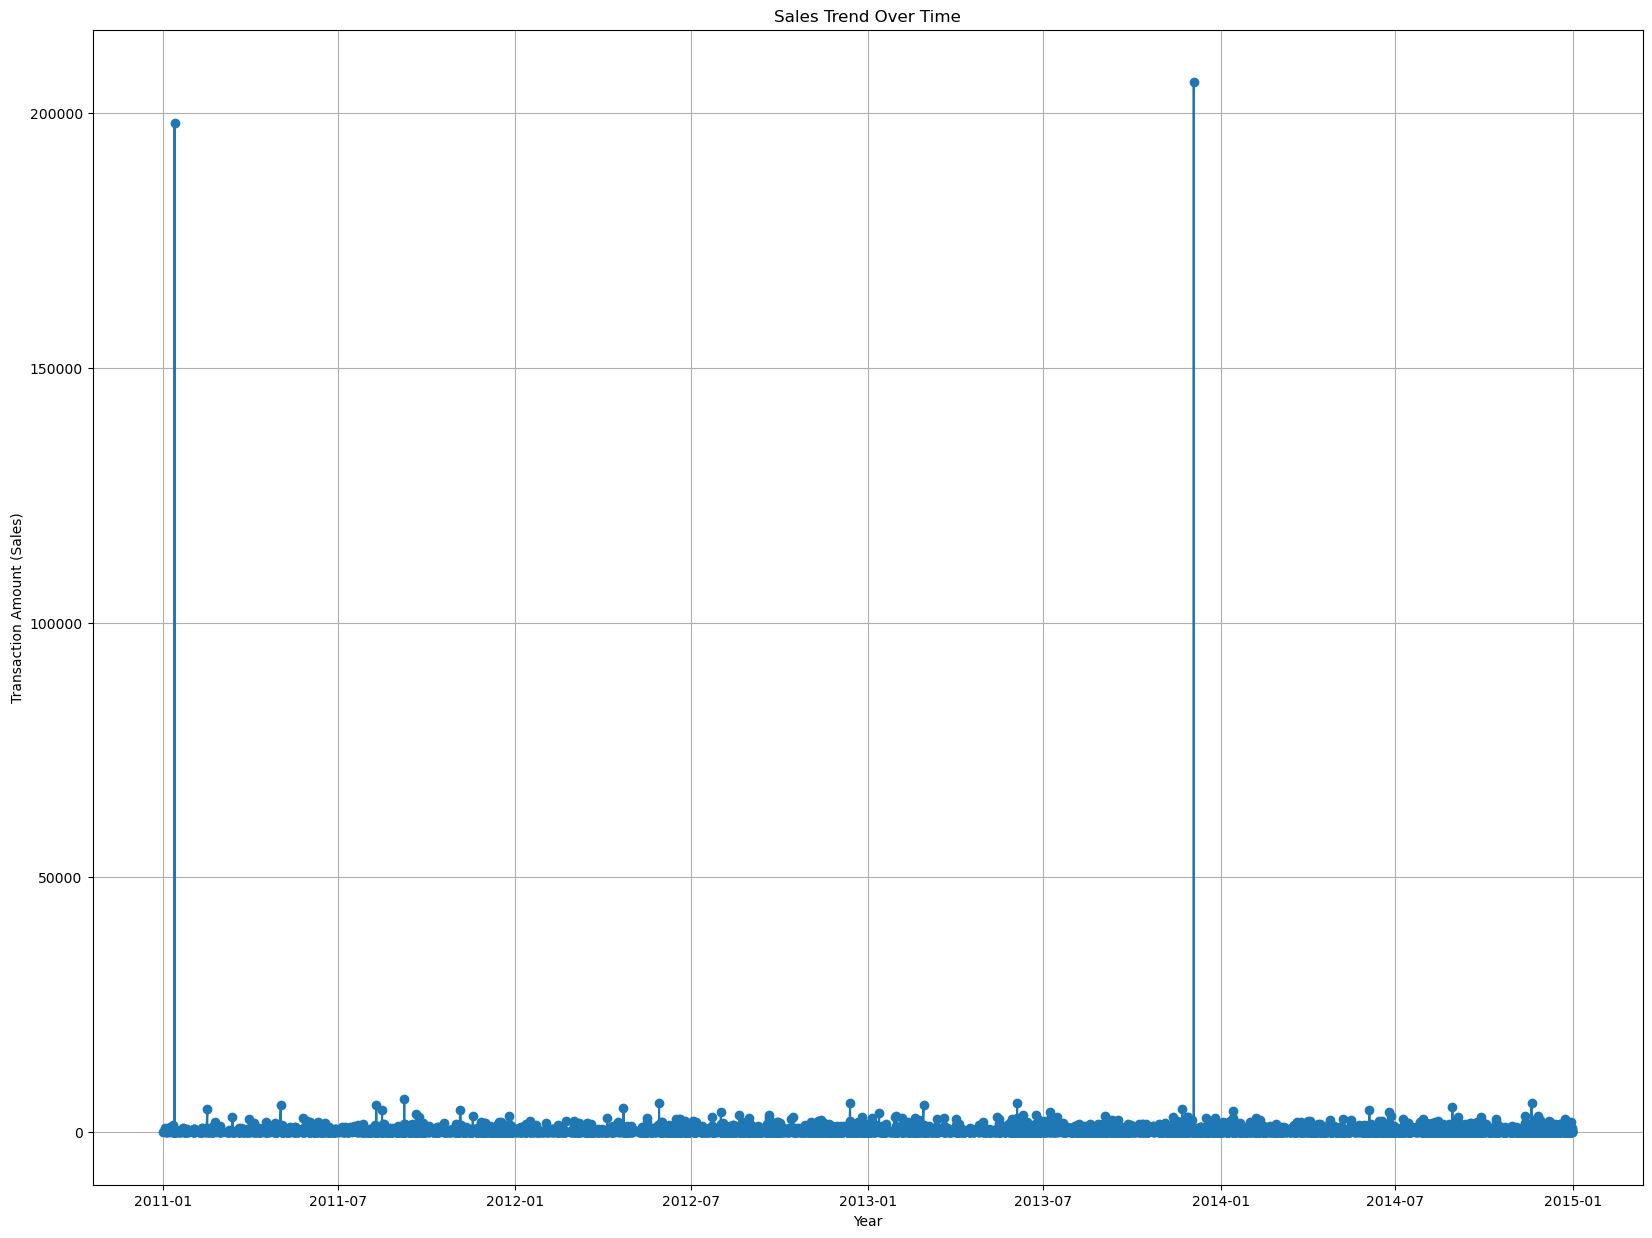

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df["Sales"] = df["Sales"].replace({'\$': ''}, regex=True).astype(float)

# sales trend
plt.figure(figsize=(20, 15))
plt.plot(df['Order Date'], df['Sales'], marker='o')  # Fixed marker
plt.xlabel("Year")
plt.ylabel("Transaction Amount (Sales)")
plt.title("Sales Trend Over Time")
plt.grid(True)
plt.show()

### ANalysing sales trend with quarterly average of sales as outliers disturb the sakes trend because of their unusual highe value nature

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3888\73348220.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarter_sales = df.resample('Q', on='Order Date').sum()


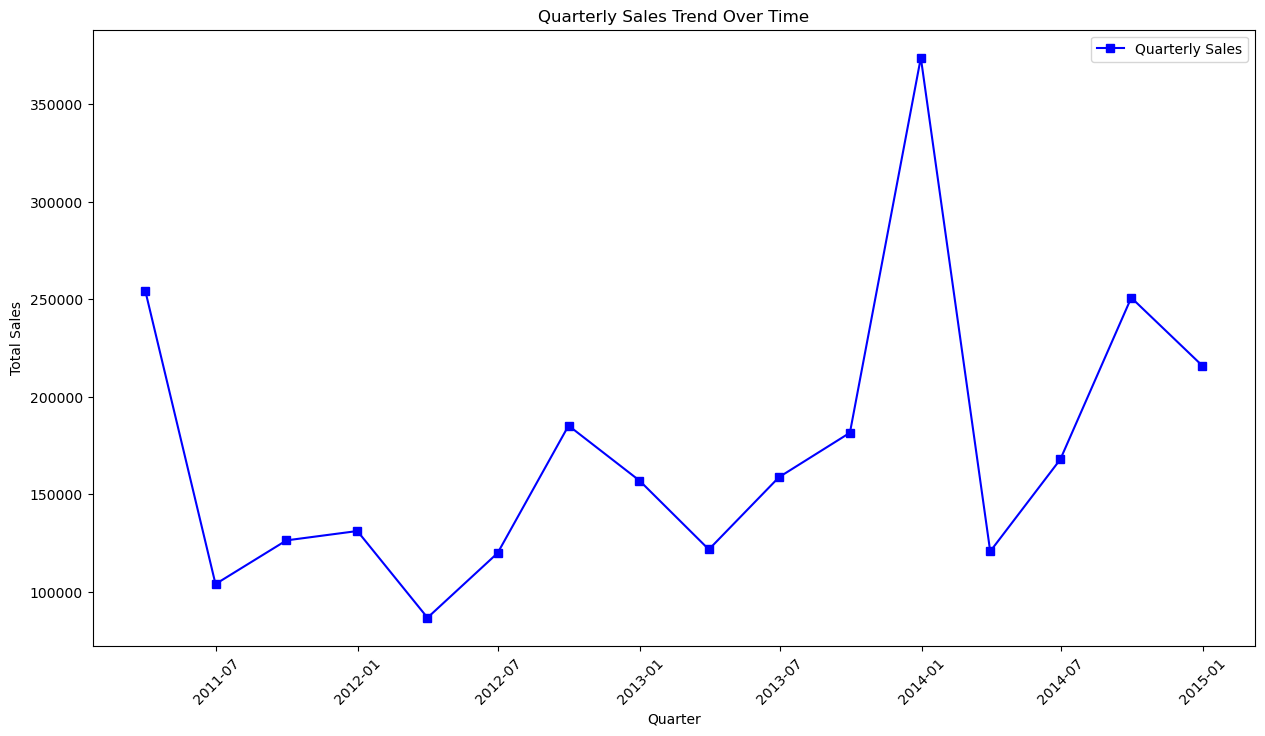

In [44]:
df_quarter_sales = df.resample('Q', on='Order Date').sum()
plt.figure(figsize=(15,8))
plt.plot(df_quarter_sales.index, df_quarter_sales['Sales'], marker='s', linestyle='-', label="Quarterly Sales", color='b')
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.title("Quarterly Sales Trend Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [46]:
first_value=df['Sales'].iloc[0]
last_value=df['Sales'].iloc[-1]
print ("Earliest date:",first_value)
print("Last date:", last_value)

Earliest date: 45.0
Last date: 867.0


### Finding out outliers in IQR

In [48]:
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df["Sales"] < lower_bound) | (df["Sales"] > upper_bound)]
num_outliers_iqr = outliers_iqr.shape[0]

print(f"Number of outliers using IQR: {num_outliers_iqr}")
print(outliers_iqr)

Number of outliers using IQR: 879
             Order ID Order Date       Customer Name         Country  \
1     AZ-2011-9050313 2011-01-03      Summer Hayward  United Kingdom   
9     AZ-2011-2918397 2011-01-07  Fredrick Beveridge          France   
10    BN-2011-3248724 2011-01-08         Archer Hort          France   
17    AZ-2011-7053593 2011-01-11       Gracie Powell  United Kingdom   
28    BN-2011-4913858 2011-01-13        Julian Dobie     Netherlands   
...               ...        ...                 ...             ...   
8013  AZ-2014-6752912 2014-12-29     Lauren Saunders          France   
8012  AZ-2014-6752912 2014-12-29     Lauren Saunders          France   
8003   AZ-2014-338779 2014-12-29      Judy Rodriquez          France   
8032  AZ-2014-3870231 2014-12-30     Thomas Thompson     Switzerland   
8046   AZ-2014-766953 2014-12-31        Jose Gambino  United Kingdom   

                                   State                 City   Region  \
1                          

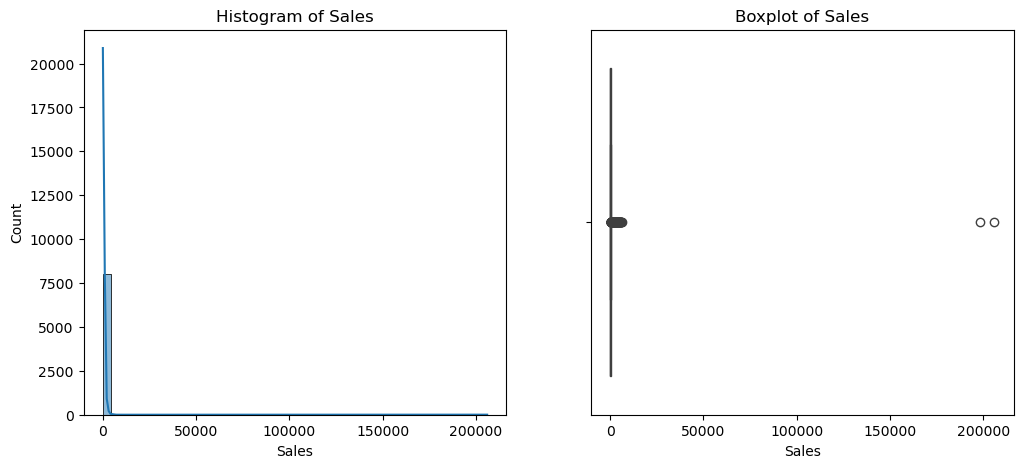

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Histogram of Sales")
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Sales"])
plt.title("Boxplot of Sales")
plt.show()

### Finding out outliers in scatter plot

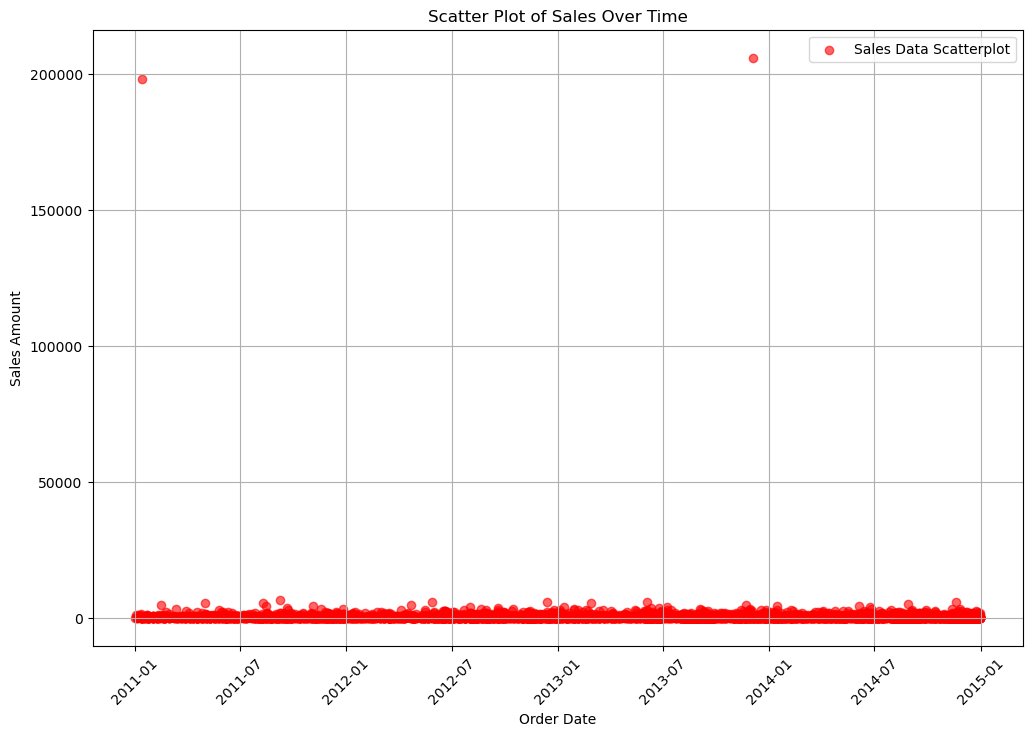

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Order Date'], df['Sales'], c='red', alpha=0.6, label="Sales Data Scatterplot")  # Fixed 'color' -> 'c'
plt.xlabel("Order Date")
plt.ylabel("Sales Amount")
plt.title("Scatter Plot of Sales Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [54]:
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45.0,-26.0,3.0
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7.0
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3.0
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27.0,-22.0,2.0
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17.0,-1.0,2.0


### Find outliers using Z score

In [56]:
df["Z_Score"] = zscore(df["Sales"])
# (Z-score threshold ±3)
outliers = df[(df["Z_Score"] > 3) | (df["Z_Score"] < -3)]
outliers

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Z_Score
28,BN-2011-4913858,2011-01-13,Julian Dobie,Netherlands,South Holland,Dordrecht,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.5,198000.0,-131.0,2.0,61.432539
5246,AZ-2013-467128,2013-12-04,John Basser,Germany,Hamburg,Hamburg,Central,Corporate,Economy,Office Supplies,Envelopes,"Kraft Peel and Seal, Security-Tint",0.0,206000.0,33.0,9.0,63.918963


### Dropping based on Z Score

In [58]:
df = df.drop([28, 5246])

### After removing the Z score the scattered plot looks better but to remove more values a better explanation of business and the data provided is required to understand on why to remove higher sales values above 2000, it can be done with IQR range as shown above but I have taken a decision to include high sales value and only discarded 2 unusually high values, The Z score range of 3 helps in covering approximately 99.73% of the data in a normal distribution 

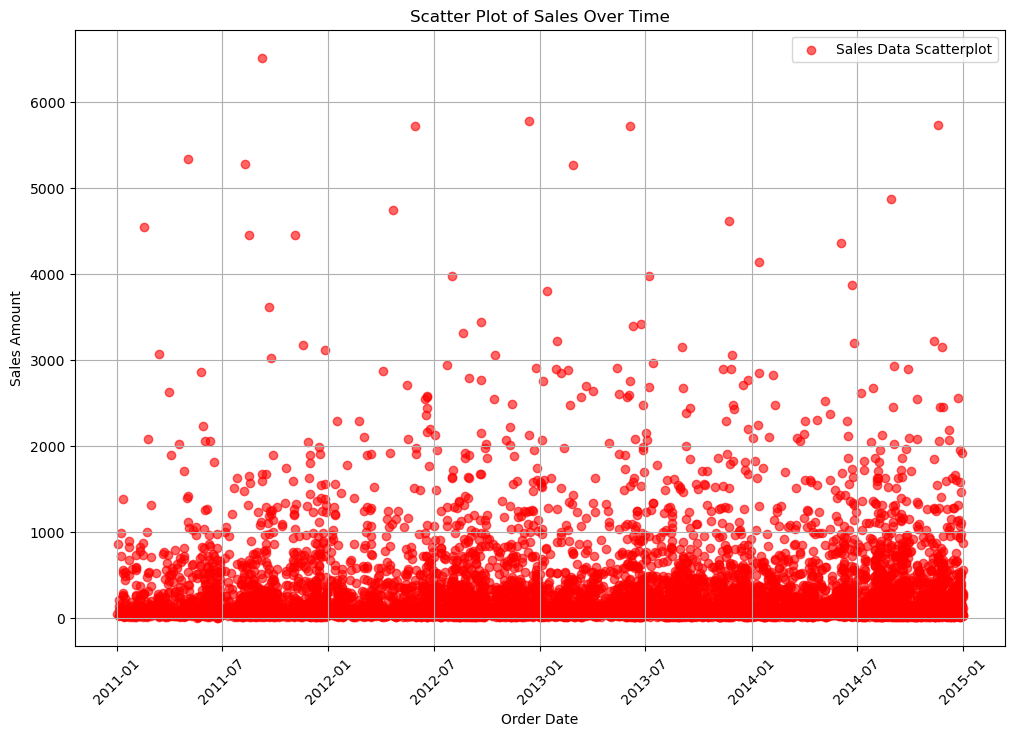

In [60]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Order Date'],df['Sales'],color='red',alpha=0.6, label="Sales Data Scatterplot")
plt.xlabel("Order Date")
plt.ylabel("Sales Amount")
plt.title("Scatter Plot of Sales Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [62]:
df['Sales'].describe()

count    8045.000000
mean      292.381852
std       488.539346
min         0.000000
25%        48.000000
50%       116.000000
75%       313.000000
max      6517.000000
Name: Sales, dtype: float64

### Checking Profit

In [64]:
discount_summary = df.groupby("Discount")[["Sales","Profit"]].sum().reset_index()
discount_summary.columns = ["Discount", "Total_Sales","Total_Profit"]
discount_summary["Profit_to_Sales_Ratio"] = discount_summary["Total_Profit"] / discount_summary["Total_Sales"]
print(discount_summary)

    Discount  Total_Sales  Total_Profit  Profit_to_Sales_Ratio
0    0.00000    1232374.0      312779.0               0.253802
1    0.10000     576660.0       95481.0               0.165576
2    0.11209       5011.0           0.0               0.000000
3    0.20000     224257.0       16479.0               0.073483
4    0.30000       4952.0        -635.0              -0.128231
5    0.40000     110980.0      -27598.0              -0.248675
6    0.50000     168319.0      -87352.0              -0.518967
7    0.60000      19849.0      -14949.0              -0.753136
8    0.70000       9116.0      -10757.0              -1.180013
9    0.80000        139.0        -426.0              -3.064748
10   0.90000        555.0       -1925.0              -3.468468


### Finding profit ratio with sales to find highest ratio is the best discount level for profit and to make the deal lucrative the discount should be betweeb 0.0 to 0.1 based on the product so that the customer gets discount while profit is made

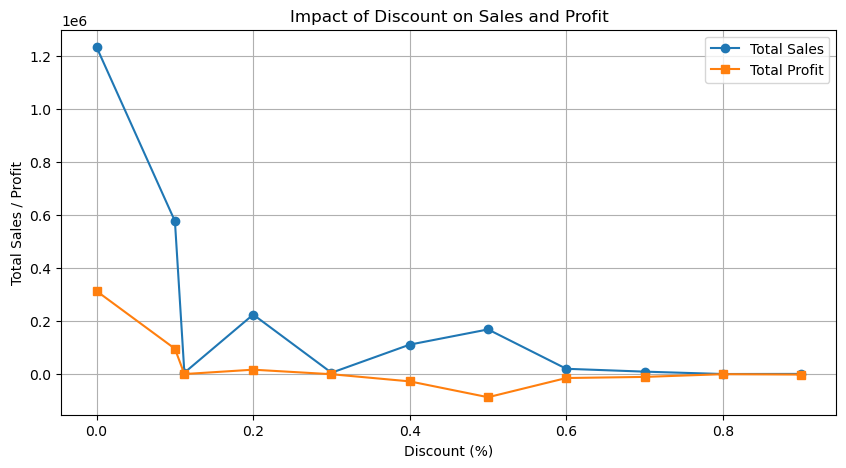

In [66]:
plt.figure(figsize=(10, 5))
#Sales graph
plt.plot(discount_summary["Discount"], discount_summary["Total_Sales"], marker='o', label="Total Sales", linestyle='-')

# Profit Graph
plt.plot(discount_summary["Discount"], discount_summary["Total_Profit"], marker='s', label="Total Profit", linestyle='-')

# Labels and Title
plt.xlabel("Discount (%)")
plt.ylabel("Total Sales / Profit")
plt.title("Impact of Discount on Sales and Profit")
plt.legend()
plt.grid(True)

plt.show()

## The graph shows that sales decreases with discount percentage as well as Profit goes negative with higher discount levels

### Finding the discount level that maximizes the profit by finding the optimal discount corresponding to the highest profit and visualizing the profit trend vs. discount levels

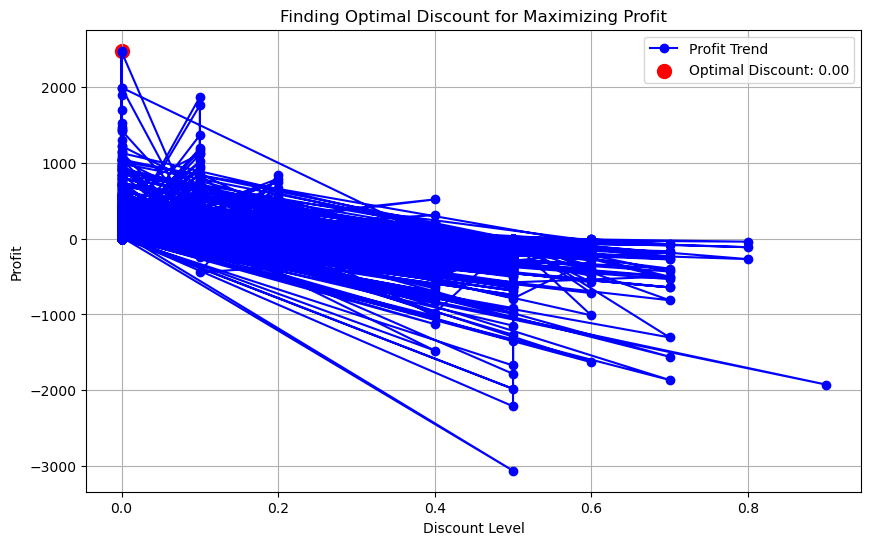

Optimal Discount Level: 0.00
Maximum Profit at Optimal Discount: 2476.00


In [68]:
optimal_index = df['Profit'].idxmax()  
optimal_discount = df.loc[optimal_index, 'Discount']
max_profit = df.loc[optimal_index, 'Profit']


plt.figure(figsize=(10, 6))
plt.plot(df['Discount'], df['Profit'], marker='o', linestyle='-', color='blue', label="Profit Trend")
plt.scatter(optimal_discount, max_profit, color='red', s=100, label=f"Optimal Discount: {optimal_discount:.2f}")

plt.xlabel("Discount Level")
plt.ylabel("Profit")
plt.title("Finding Optimal Discount for Maximizing Profit")
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal Discount Level: {optimal_discount:.2f}")
print(f"Maximum Profit at Optimal Discount: {max_profit:.2f}")

### Finding Average Sales Trend per year

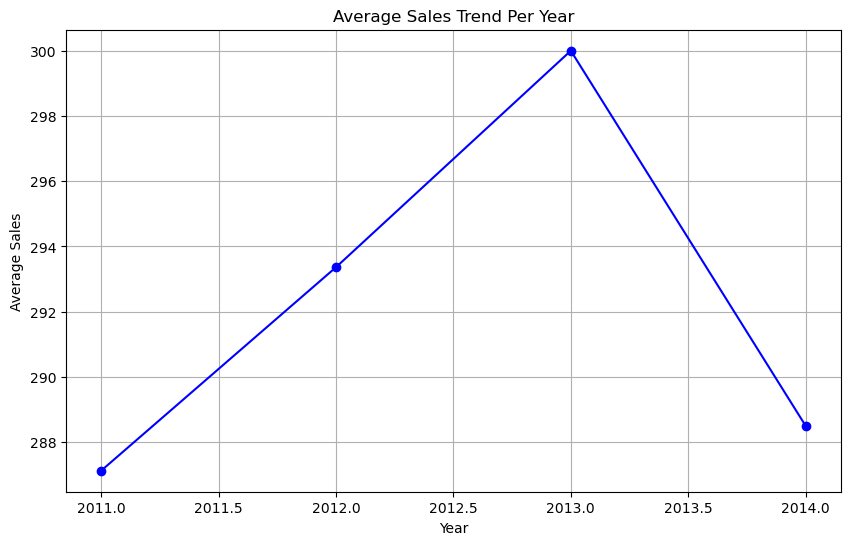

In [70]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extracting order year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

#Average sales per year
average_sales_per_year = df.groupby("Year")["Sales"].mean().reset_index()
average_sales_per_year.rename(columns={"Sales": "Average_Sales"}, inplace=True)


# Average sales value trend per half year
plt.figure(figsize=(10, 6))
plt.plot(average_sales_per_year["Year"], average_sales_per_year["Average_Sales"], marker="o", linestyle="-", color="blue")
plt.title("Average Sales Trend Per Year")
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.grid(True)
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8045 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8045 non-null   object        
 1   Order Date     8045 non-null   datetime64[ns]
 2   Customer Name  8045 non-null   object        
 3   Country        8045 non-null   object        
 4   State          8045 non-null   object        
 5   City           8045 non-null   object        
 6   Region         8045 non-null   object        
 7   Segment        8045 non-null   object        
 8   Ship Mode      8045 non-null   object        
 9   Category       8045 non-null   object        
 10  Sub-Category   8045 non-null   object        
 11  Product Name   8045 non-null   object        
 12  Discount       8045 non-null   float64       
 13  Sales          8045 non-null   float64       
 14  Profit         8032 non-null   float64       
 15  Quantity       8045 non-nu

In [76]:
df.head(5)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Z_Score,Year
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45.0,-26.0,3.0,-0.092468,2011
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7.0,0.158971,2011
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3.0,-0.062942,2011
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27.0,-22.0,2.0,-0.098063,2011
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17.0,-1.0,2.0,-0.101171,2011


In [ ]:
# ANother datafrome for correlation

In [78]:
lr_df=df.copy()
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8045 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8045 non-null   object        
 1   Order Date     8045 non-null   datetime64[ns]
 2   Customer Name  8045 non-null   object        
 3   Country        8045 non-null   object        
 4   State          8045 non-null   object        
 5   City           8045 non-null   object        
 6   Region         8045 non-null   object        
 7   Segment        8045 non-null   object        
 8   Ship Mode      8045 non-null   object        
 9   Category       8045 non-null   object        
 10  Sub-Category   8045 non-null   object        
 11  Product Name   8045 non-null   object        
 12  Discount       8045 non-null   float64       
 13  Sales          8045 non-null   float64       
 14  Profit         8032 non-null   float64       
 15  Quantity       8045 non-nu

In [80]:
lr_df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Z_Score,Year
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45.0,-26.0,3.0,-0.092468,2011
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7.0,0.158971,2011
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3.0,-0.062942,2011
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27.0,-22.0,2.0,-0.098063,2011
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17.0,-1.0,2.0,-0.101171,2011


### Creating new dataframe and finding correlation matrix

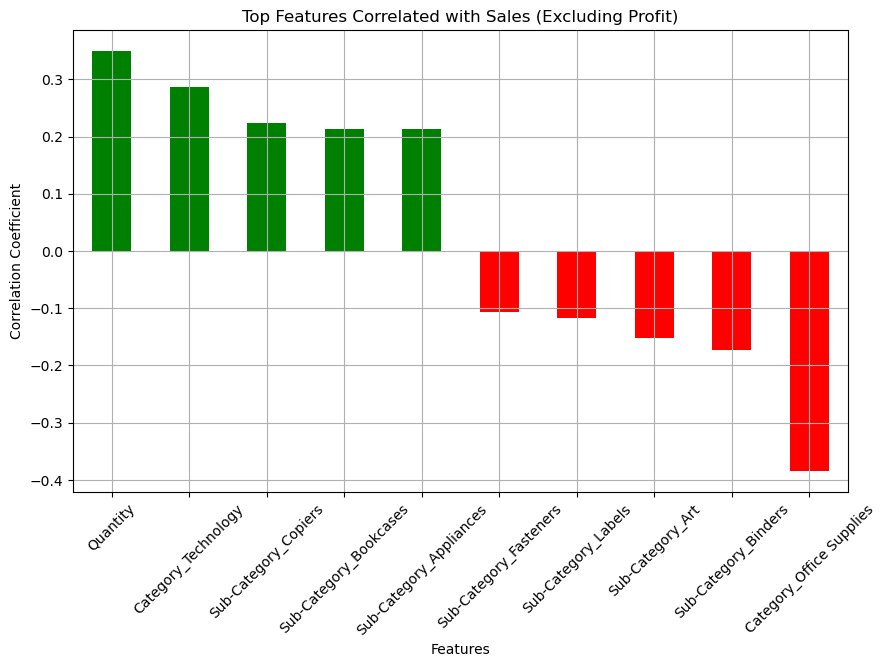

In [86]:
lr_df_encoded = lr_df.drop(columns=["Profit","Year","Z_Score","Order ID","Order Date","Customer Name"], errors="ignore")

# One-hot encoding
categorical_columns = ["Country", "State", "City", "Region", "Segment", "Ship Mode", "Category", "Sub-Category","Product Name"]
existing_categorical_columns = [col for col in categorical_columns if col in lr_df_encoded.columns]

# Categorical columns to numeric using one-hot encoding
lr_df_encoded = pd.get_dummies(lr_df_encoded, columns=existing_categorical_columns, drop_first=True)

#Numerical columns
numeric_columns = ["Discount", "Sales", "Quantity"]
for col in numeric_columns:
    lr_df_encoded[col] = pd.to_numeric(lr_df_encoded[col], errors='coerce')

# Correlation matrix 
correlation_matrix = lr_df_encoded.corr()

# Correlation with respect to sales
sales_correlation = correlation_matrix["Sales"].sort_values(ascending=False)

#Top positive and negative features
top_positive_features = sales_correlation.drop("Sales").head(5)
top_negative_features = sales_correlation.drop("Sales").tail(5)

# top correlated features
top_correlated_features = pd.concat([top_positive_features, top_negative_features])

# positive and negative correlations are included
if len(top_positive_features) < 5:
    missing = 5 - len(top_positive_features)
    additional_negatives = sales_correlation.drop("Sales").tail(5 + missing)
    top_correlated_features = pd.concat([top_positive_features, additional_negatives])

# Designate color code
colors = ["green" if x > 0 else "red" for x in top_correlated_features.values]

# Top correlated features
plt.figure(figsize=(10, 6))
top_correlated_features.plot(kind="bar", color=colors)
plt.title("Top Features Correlated with Sales (Excluding Profit)")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### First purchase year of products

In [88]:
customer_first_purchase = df.groupby("Customer Name")["Order Date"].min().reset_index()

In [90]:
customer_first_purchase = df.groupby("Customer Name")["Order Date"].min().reset_index()
customer_first_purchase["First_Purchase_Year"] = customer_first_purchase["Order Date"].dt.year
customer_year_final = customer_first_purchase[["Customer Name", "First_Purchase_Year"]]
print(customer_year_final)

        Customer Name  First_Purchase_Year
0       Aaron Bootman                 2011
1    Aaron Cunningham                 2011
2         Aaron Davey                 2011
3     Aaron Macrossan                 2011
4         Abbie Perry                 2011
..                ...                  ...
787        Zara Loton                 2013
788        Zara Money                 2011
789       Zoe Lanigan                 2011
790         Zoe Lowin                 2011
791        Zona Meyer                 2012

[792 rows x 2 columns]


In [92]:
new_df=df[["Customer Name", "Order Date", "Sales"]].copy()
new_df["Order Date"]=pd.to_datetime(new_df["Order Date"])
new_df["Origin_year"]=new_df.groupby("Customer Name")["Order Date"].transform('min').dt.year
new_df.head(5)

,Customer Name,Order Date,Sales,Origin_year
0,Ruby Patel,2011-01-01,45.0,2011
1,Summer Hayward,2011-01-03,854.0,2011
2,Devin Huddleston,2011-01-04,140.0,2011
3,Mary Parker,2011-01-04,27.0,2011
4,Mary Parker,2011-01-04,17.0,2011


In [94]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8045 entries, 0 to 8046
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  8045 non-null   object        
 1   Order Date     8045 non-null   datetime64[ns]
 2   Sales          8045 non-null   float64       
 3   Origin_year    8045 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 540.9+ KB


### Calculating Origin year

In [96]:
new_df["start"]=pd.to_datetime(new_df["Origin_year"].astype(str)+'-01-01')
new_df["Time_since_origin"]=((new_df["Order Date"].dt.year-new_df["start"].dt.year)*12+((new_df["Order Date"].dt.month-new_df["start"].dt.month)))
last_date=new_df['Order Date'].max()

In [98]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8045 entries, 0 to 8046
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer Name      8045 non-null   object        
 1   Order Date         8045 non-null   datetime64[ns]
 2   Sales              8045 non-null   float64       
 3   Origin_year        8045 non-null   int32         
 4   start              8045 non-null   datetime64[ns]
 5   Time_since_origin  8045 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(2), object(1)
memory usage: 635.1+ KB


In [100]:
new_df.head(5)

,Customer Name,Order Date,Sales,Origin_year,start,Time_since_origin
0,Ruby Patel,2011-01-01,45.0,2011,2011-01-01,0
1,Summer Hayward,2011-01-03,854.0,2011,2011-01-01,0
2,Devin Huddleston,2011-01-04,140.0,2011,2011-01-01,0
3,Mary Parker,2011-01-04,27.0,2011,2011-01-01,0
4,Mary Parker,2011-01-04,17.0,2011,2011-01-01,0


### Finding cumulative amount for origin years

In [104]:
new_df['clv_'] = (new_df['Order Date'].dt.year - new_df['Origin_year']) * 12 + new_df['Order Date'].dt.month
def classify_tenure(tenure):
    bins = [0, 12, 24, 36, 48, 60, float('inf')]
    labels = [12, 24, 36, 48, 60, 72]
    return pd.cut([tenure], bins=bins, labels=labels)[0]
new_df['Amount.cmltv'] = new_df['clv_'].apply(classify_tenure)
amount_transcation_tenure = new_df.pivot_table(values='Sales', index='Origin_year', columns='Amount.cmltv', aggfunc='sum')
amount_transcation_tenure

Amount.cmltv,12,24,36,48
Origin_year,,,,
2011,417753.0,335925.0,376906.0,482256.0
2012,212955.0,169485.0,195604.0,NaN
2013,83627.0,65593.0,NaN,NaN
2014,12108.0,NaN,NaN,NaN


In [106]:
amount_transcation_tenure = amount_transcation_tenure.cumsum(axis = 1) # cumsum over columns
print(amount_transcation_tenure)

Amount.cmltv        12        24         36         48
Origin_year                                           
2011          417753.0  753678.0  1130584.0  1612840.0
2012          212955.0  382440.0   578044.0        NaN
2013           83627.0  149220.0        NaN        NaN
2014           12108.0       NaN        NaN        NaN


In [110]:
amount_transcation_tenure_TRANSPOSE = amount_transcation_tenure.reset_index().melt(id_vars=["Origin_year"], var_name="Amount.cmltv", value_name="Value")

In [112]:
amount_transcation_tenure_TRANSPOSE

,Origin_year,Amount.cmltv,Value
0,2011,12,417753.0
1,2012,12,212955.0
2,2013,12,83627.0
3,2014,12,12108.0
4,2011,24,753678.0
5,2012,24,382440.0
6,2013,24,149220.0
7,2014,24,NaN
8,2011,36,1130584.0
9,2012,36,578044.0


### Finding customers

In [108]:
unique_customers_per_year = new_df.groupby('Origin_year')['Customer Name'].nunique()
print("Number of Unique Customers per Year:")
print(unique_customers_per_year)

Number of Unique Customers per Year:
Origin_year
2011    492
2012    204
2013     79
2014     17
Name: Customer Name, dtype: int64


In [114]:
new_customers_summary = new_df.groupby("Origin_year")["Customer Name"].nunique().reset_index()
new_customers_summary.rename(columns={"Customer Name": "New_Customers"}, inplace=True)

# Rime columns(12, 24, 36, 48, 60, 72 months)
time_columns = [12, 24, 36, 48, 60, 72]

for col in time_columns:
    new_customers_summary[col] = new_customers_summary["New_Customers"]

new_customers_summary.drop(columns=["New_Customers"], inplace=True)

# Formatting the 'Origin' column to match the required date range format
new_customers_summary["Origin"] = (
    new_customers_summary["Origin_year"].astype(str) + "-01-01 - " + 
    new_customers_summary["Origin_year"].astype(str) + "-12-31"
)

# Reordering in the columns for final outpu to match the data shown in pdf
formatted_output = new_customers_summary[["Origin"] + time_columns]

In [116]:
formatted_output

,Origin,12,24,36,48,60,72
0,2011-01-01 - 2011-12-31,492,492,492,492,492,492
1,2012-01-01 - 2012-12-31,204,204,204,204,204,204
2,2013-01-01 - 2013-12-31,79,79,79,79,79,79
3,2014-01-01 - 2014-12-31,17,17,17,17,17,17


In [118]:
formatted_output['Origin_year'] = formatted_output['Origin'].str[:4].astype(int)
formatted_output.set_index('Origin_year', inplace=True)
formatted_output.drop(columns=['Origin'], inplace=True)
common_columns = amount_transcation_tenure.columns.intersection(formatted_output.columns)
new_customers_aligned = formatted_output[common_columns]
amount_aligned = amount_transcation_tenure[common_columns]
historic_clv = amount_aligned / new_customers_aligned
historic_clv.columns = historic_clv.columns.astype(int)  # Ensure column names are integers
print("Historic CLV:")
print(historic_clv)

Historic CLV:
Amount.cmltv           12           24           36           48
Origin_year                                                     
2011           849.091463  1531.865854  2297.934959  3278.130081
2012          1043.897059  1874.705882  2833.549020          NaN
2013          1058.569620  1888.860759          NaN          NaN
2014           712.235294          NaN          NaN          NaN


### Cohort CLV graph

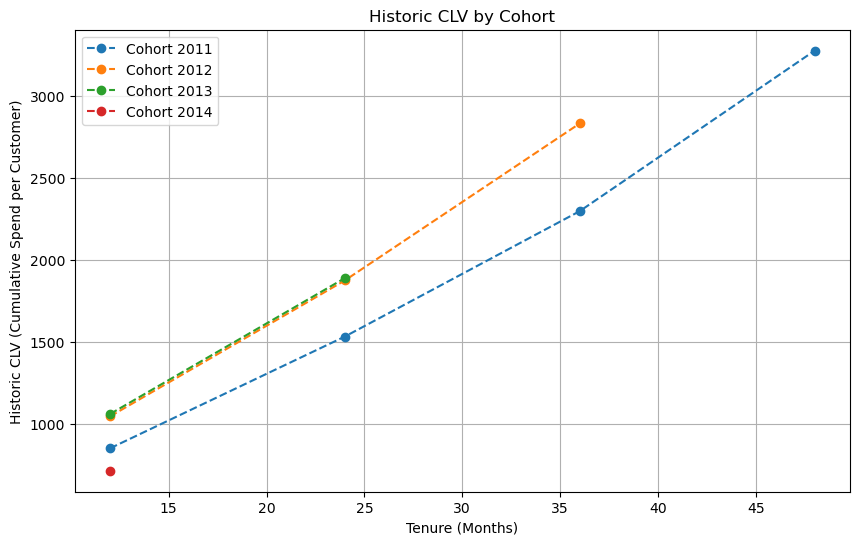

In [120]:
plt.figure(figsize=(10, 6))
# Plot each cohort's CLV
for year in historic_clv.index:
    plt.plot(
        historic_clv.columns.astype(int),
        historic_clv.loc[year],
        marker='o',
        linestyle='--',
        label=f'Cohort {year}'
    )
# Plotting the graph
plt.title('Historic CLV by Cohort')
plt.xlabel('Tenure (Months)')
plt.ylabel('Historic CLV (Cumulative Spend per Customer)')
plt.legend()
plt.grid(True)
plt.show()

In [151]:
#Finding common columns for the two clv's
common_columns = amount_transcation_tenure.columns.intersection(formatted_output.columns)
#Storing it in another frame 
total_amount = pd.Series(dtype=float)
total_customers = pd.Series(dtype=float)

# Calculating total for each tenure
for tenure in common_columns:
    # Find cohorts with non-NaN amounts for this tenure
    valid_cohorts = amount_transcation_tenure[tenure].dropna().index
    
    # Sum amounts and customers ONLY for valid cohorts
    total_amount[tenure] = amount_transcation_tenure.loc[valid_cohorts, tenure].sum()
    total_customers[tenure] = formatted_output.loc[valid_cohorts, tenure].sum()

# weighted average clv
weighted_avg_clv = total_amount / total_customers

print("Volume-Weighted Average Historic CLV:")
print(weighted_avg_clv.to_frame())

Volume-Weighted Average Historic CLV:
              0
12   917.226010
24  1658.500645
36  2454.925287
48  3278.130081


In [ ]:
#Based on the calculations the per customer for 2011 cohort has a historic customer life value of 3,278.13 at 48 months.
#Total for the cohort =492*3278.13=1,612,840


In [126]:
weighted_avg_clv

12     917.226010
24    1658.500645
36    2454.925287
48    3278.130081
dtype: float64

2011 Cohort shows steady growth in spending over time (CLV increases from $917.23 at 12 months to $3,278.13 at 48 months).
2012 Cohort: Higher initial spending ($1,043.90 at 12 months)
2013 Cohort: Highest initial spending ($1,058.57 at 12 months) 
2014 Cohort: Lowest initial spending ($712.24 at 12 months)

Cohorts of 2013 and 2014 show divergent initial spending behaviors compared to older cohorts.
Older cohorts of 2011 and 2012 demonstrate sustained growth, while newer cohorts lack long-term visibility.

Business Implications:
Investing in retention programs for older cohorts to maintain their steady spending as the spending increases as customer age increases.
Address the low initial spending of the 2014 cohort (e.g., personalized offers, improved onboarding).
Data-Driven Forecasting:
Using the 2011 cohort as a benchmark for long-term revenue projections.
Prioritize tracking newer cohorts to fill data gaps and refine strategies.



In [130]:
amount_transcation_tenure.cumsum()

Amount.cmltv,12,24,36,48
Origin_year,,,,
2011,417753.0,753678.0,1130584.0,1612840.0
2012,630708.0,1136118.0,1708628.0,NaN
2013,714335.0,1285338.0,NaN,NaN
2014,726443.0,NaN,NaN,NaN
